## Bank Customer Churn Prediction using DNN 
In this notebook, you will be getting an idea,

1. How to Started With ANN using TensorFlow 2.0
2. Feature selection
3. Differents type of optimizer and activation function
4. Sampling techniques

Data set
https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

In [45]:
# Import the library for use for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings('ignore')

In [46]:
data=pd.read_csv("Churn_Modelling.csv")  

In [47]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
#Check the Null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Figure size 2160x1440 with 0 Axes>

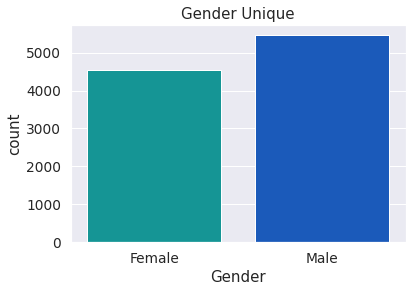

<Figure size 2160x1440 with 0 Axes>

In [49]:
sns.countplot(data['Gender'],data=data,palette='winter_r')
plt.title('Gender Unique')
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

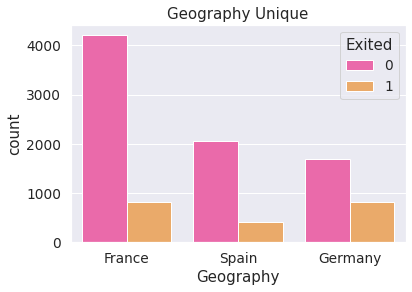

<Figure size 2160x1440 with 0 Axes>

In [50]:
sns.countplot(data['Geography'],hue = 'Exited',data=data,palette='spring')
plt.title('Geography Unique')
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

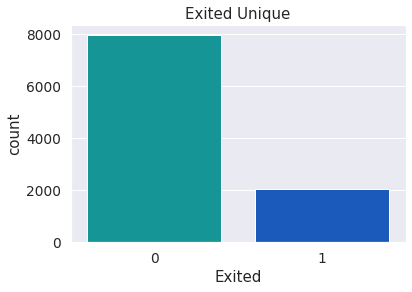

<Figure size 2160x1440 with 0 Axes>

In [51]:
sns.countplot(data['Exited'],data=data,palette='winter_r')
plt.title('Exited Unique')
plt.figure(figsize=(30,20))

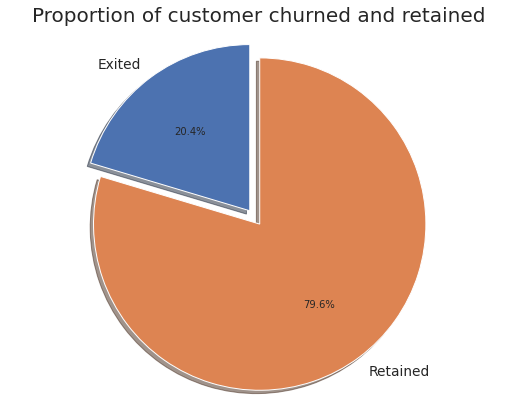

In [52]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [53]:
#Drop the unwanted columns from the data set
x=data.drop(labels=["RowNumber","Surname","CustomerId","Exited"],axis=1)


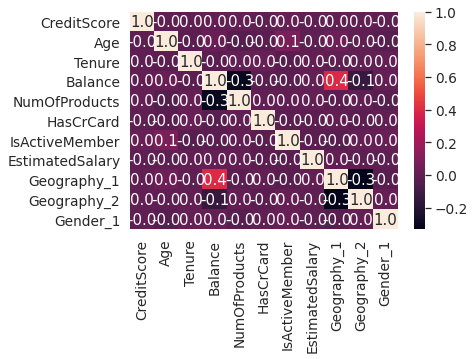

In [97]:
#Find the Covariance of each continuous variable in our data set
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(x.corr(), annot = True,fmt = ".1f")
plt.show()

In [55]:
#Find the uniques values of the Exited feature
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [56]:
y=data["Exited"]

In [57]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [58]:
#Conver factor variable to numeric values
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x['Geography']=label.fit_transform(x.Geography)
x['Gender']=label.fit_transform(x.Gender)

In [59]:
#Unique values for Gender and Geography
print("Gender Unique values are " +"\n"+ str(x['Gender'].value_counts()))
print("Geography Unique values are " +"\n"+ str(x['Geography'].value_counts()))

Gender Unique values are 
1    5457
0    4543
Name: Gender, dtype: int64
Geography Unique values are 
0    5014
1    2509
2    2477
Name: Geography, dtype: int64


In [60]:
# Get the dummies variables for label encoder values
x=pd.get_dummies(x,drop_first=True,columns=['Geography'])
x=pd.get_dummies(x,drop_first=True,columns=['Gender'])


### Feature Scaling 

In [61]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [62]:
x_train

array([[-1.24021723,  0.77986083,  0.35390313, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.75974873, -0.27382717,  0.35390313, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [-1.72725557, -0.9443559 , -0.3390904 , ..., -0.57812007,
        -0.57504086, -1.09665089],
       ...,
       [-0.51484098,  0.87565065,  1.39339343, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [ 0.73902369, -0.36961699, -1.03208393, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.95663657, -1.32751517,  0.35390313, ..., -0.57812007,
         1.73900686,  0.91186722]])

### Build ANN with one hidden layer


In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Geography_1      10000 non-null  uint8  
 9   Geography_2      10000 non-null  uint8  
 10  Gender_1         10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [65]:
print(tf.__version__)

2.4.1


In [66]:
model=Sequential()
# Firstly, we will develop the input layer 
model.add(Dense(x.shape[1],activation="relu",kernel_initializer = 'he_normal',bias_initializer='zeros'))
# Hidden Layer
model.add(Dense(128,activation="relu"))
#Out put layer
model.add(Dense(1,activation="sigmoid"))

### Compiling the ANN

In [67]:
model.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(x=x_train,y=y_train.to_numpy(),batch_size=10,epochs=20,verbose=1)

Epoch 1/20
800/800 [==============================] - 1s 1ms/step - loss: 0.5244 - accuracy: 0.7740
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4416 - accuracy: 0.8124
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4247 - accuracy: 0.8213
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4334 - accuracy: 0.8174
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8275
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3941 - accuracy: 0.8361
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4152 - accuracy: 0.8291
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4034 - accuracy: 0.8350
Epoch 9/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4017 - accuracy: 0.8353
Epoch 10/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4085 - accuracy: 0.8354

In [69]:
# Predict the train data set output values
y_pred_tr=model.predict_classes(x_train)

print(y_pred_tr)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [70]:
## Find the Accuracy, Precision and recall of the train data set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
train_cm=confusion_matrix(y_train,y_pred_tr)
print("accuracy of the train data set" + " "+ str(accuracy_score(y_train, y_pred_tr)))
print(classification_report(y_train,y_pred_tr))

accuracy of the train data set 0.86025
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6370
           1       0.79      0.43      0.56      1630

    accuracy                           0.86      8000
   macro avg       0.83      0.70      0.74      8000
weighted avg       0.85      0.86      0.84      8000



Text(62.5, 0.5, 'Truth')

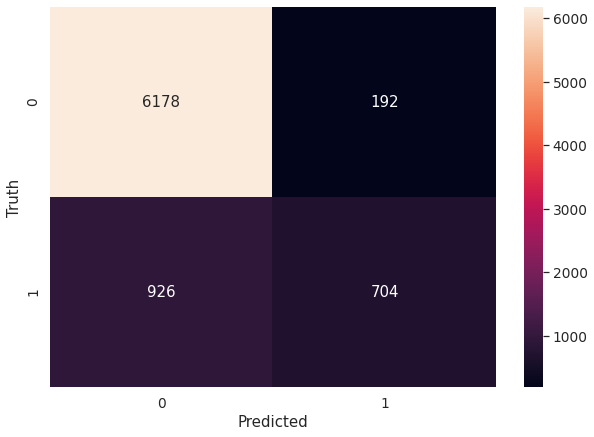

In [71]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_pred_tr)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
## Find the Accuracy, Precision and recall of the test data set
# fit the model with test data set
ypred_te=model.predict_classes(x_test)
print(model.evaluate(x_test,y_test.to_numpy()))
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
test_cm=confusion_matrix(y_test,ypred_te)
print("accuracy of the test data set" + " "+ str(accuracy_score(y_test, ypred_te)))
print(classification_report(y_test,ypred_te))

63/63 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8555
[0.36228030920028687, 0.8554999828338623]
accuracy of the test data set 0.8555
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.82      0.37      0.51       407

    accuracy                           0.86      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000



Text(62.5, 0.5, 'Truth')

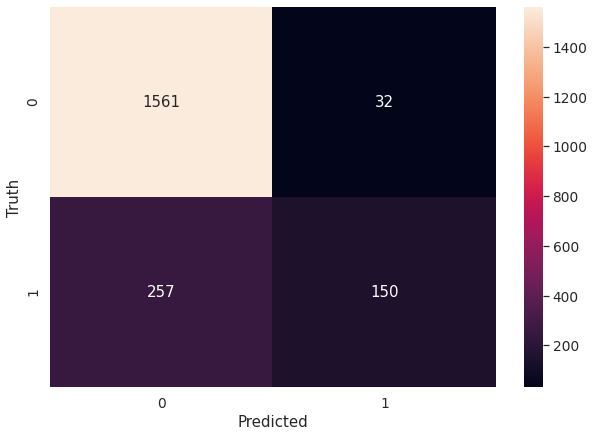

In [73]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=ypred_te)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Build ANN with two hidden layer and different optimizer function¶

In [74]:
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')

In [75]:
model2=Sequential()
# Firstly, we will develop the input layer 
model2.add(Dense(x.shape[1],activation="elu",kernel_initializer = initializer,bias_initializer='zeros',input_dim = x.shape[1]))
# first Hidden Layer
model2.add(Dense(128,activation="elu",kernel_initializer = initializer))
#Second hidden layer
model2.add(Dense(64,activation="elu",kernel_initializer = initializer))
#Out put layer
model2.add(Dense(1,activation="sigmoid"))

### Compiling the second ANN

In [76]:
model2.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(x=x_train,y=y_train.to_numpy(),batch_size=10,epochs=20,verbose=1)

Epoch 1/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4833 - accuracy: 0.7981
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4305 - accuracy: 0.8113
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.8122
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.8101
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4280 - accuracy: 0.8059
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4147 - accuracy: 0.8227
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.8240
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4078 - accuracy: 0.8307
Epoch 9/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8266
Epoch 10/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4051 - accuracy: 0.8301

Nevertheless,in the both model we got same accuracy so, Now we have to handle the imbalance data set and do some sampling techniques such as over sampling, under sampling and underover sampling techniques. This techniques will help to enhance our total accuracy

In [90]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x_train, y_train)

In [91]:
y_sm

array([1, 0, 0, ..., 1, 1, 1])

In [92]:
print(x_sm)

[[-1.24021723  0.77986083  0.35390313 ... -0.57812007 -0.57504086
  -1.09665089]
 [ 0.75974873 -0.27382717  0.35390313 ...  1.72974448 -0.57504086
   0.91186722]
 [-1.72725557 -0.9443559  -0.3390904  ... -0.57812007 -0.57504086
  -1.09665089]
 ...
 [-0.29084949  1.45038956  1.39339343 ... -0.57812007 -0.57504086
  -0.46720479]
 [-0.95357966  0.22214908  1.3144682  ... -0.57812007  1.73900686
  -1.09665089]
 [ 0.89017373  1.2981286  -1.22757301 ... -0.57812007 -0.57504086
  -1.09665089]]


In [85]:
#from sklearn.model_selection import train_test_split
#X_train_im, x_sm, y_sm, y_test_im = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

### Build ANN wit hone hidden layer after handle the imbalanced issue

In [93]:
model=Sequential()
# Firstly, we will develop the input layer 
model.add(Dense(x.shape[1],activation="relu",kernel_initializer = 'he_normal',bias_initializer='zeros'))
# Hidden Layer
model.add(Dense(128,activation="relu"))
#Out put layer
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=x_sm,y=y_sm,batch_size=10,epochs=20,verbose=1)

Epoch 1/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.6266 - accuracy: 0.6622
Epoch 2/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7420
Epoch 3/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.5020 - accuracy: 0.7528
Epoch 4/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.4802 - accuracy: 0.7682
Epoch 5/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.4713 - accuracy: 0.7690
Epoch 6/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.4649 - accuracy: 0.7756
Epoch 7/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.4652 - accuracy: 0.7742
Epoch 8/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy: 0.7796
Epoch 9/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.4332 - accuracy: 0.7918
Epoch 10/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.438

In [94]:
# Accuracy for the test data set
## Find the Accuracy, Precision and recall of the test data set
# fit the model with test data set
ypred=model.predict_classes(x_test)
print(model.evaluate(x_test,y_test.to_numpy()))
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
test_cm=confusion_matrix(y_test,ypred)
print("accuracy of the test data set" + " "+ str(accuracy_score(y_test, ypred)))
print(classification_report(y_test,ypred))

63/63 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7690
[0.47499045729637146, 0.7689999938011169]
accuracy of the test data set 0.769
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



### Conclusion
Without doing any hyperparameter our model has an accuracy of around 87 for the train data set and 86 for the test data set and after did the sampling techniques our model accuracy was gone down So, we have to try a different type of sampling techniques as well as do some feature selection in the data set.